In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ClusterBasing import ClusterBasing
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import PlotScatter,GetLineOfOptima,GetOptimalT

In [2]:
basefolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/';

#    parameterfile = 'ProteinData_ttx_1hr_2/Analysis_dataWindow_3/dataWindow_3_parameters';
#    parameterfile = 'ProteinData_ttx_1hr_2/Analysis_dataWindow_7/dataWindow_7_parameters';    
parameterfile = 'MikeData/Analysis_dataWindow_1/dataWindow_1_parameters';    

15184 points loaded from /Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/Analysis_dataWindow_1/dataWindow_1_filtered_incell.txt
6963 points loaded from /Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/Analysis_dataWindow_1/dataWindow_1_filtered_outcell.txt
Loaded Clustering results from /Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/Analysis_dataWindow_1/results_dataWindow_1_incell.pickle
Loaded Clustering results from /Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/Analysis_dataWindow_1/results_dataWindow_1_outcell.pickle
0.8
T= 208
Progress: |██████████████████████████████████████████████████| 100.0% Complete0.0% Complete
Computing similarity scores: 50.53 seconds
sigma                                                                 0.09884
threshold                                                                 4.0
labels                      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
labels_ref             

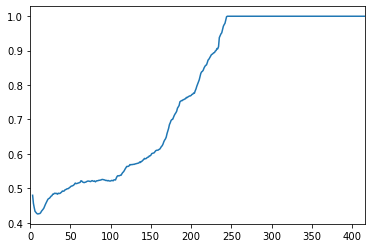

In [4]:
CB = ClusterBasing(basefolder,parameterfile);
CB.GetClusterings_InOutCell();

0.55
T= 117
Progress: |██████████████████████████████████████████████████| 100.0% Complete0.0% Complete
Computing similarity scores: 91.5 seconds
sigma                                                                0.151467
threshold                                                                 9.0
labels                      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
labels_ref                  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
no_clusters                                                              14.0
no_clusters_ref                                                          10.0
no_clusters_s_vs_n                                                   0.714459
T                                                                         117
percent_locsIncluded                                                 0.557626
percent_locsIncluded_ref                                             0.236536
similarityScore                                                        103

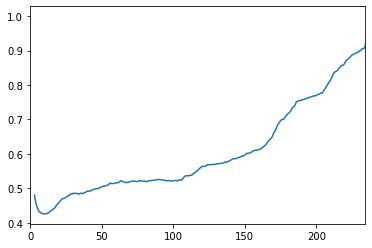

In [12]:
CB.GetReferenceClustering(bestRequiredRate=0.55);
CB.GetClustering();

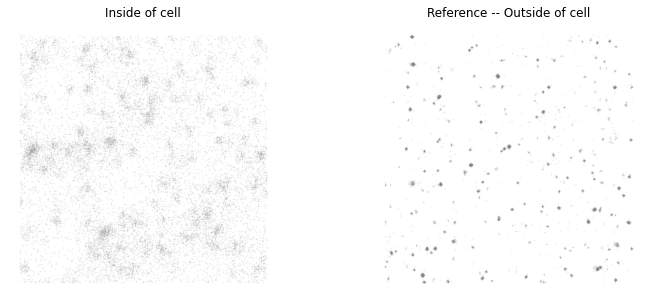

In [13]:
#Plot Overview
fig,axs = plt.subplots(1,2,figsize=(12,5));
PlotScatter(CB.XC_incell,ax=axs[0])
PlotScatter(CB.XC_outcell,ax=axs[1])
#np.savetxt(outputfolder_R+analysis_name+"_filtered_incell.txt",XC_incell,fmt="%f\t%f");    
axs[0].set_title('in cell,'+str(len(CB.XC_incell))+' points');
#axs[0].set_xlim(150,158);
#axs[0].set_ylim(140,147);

axs[1].set_title('out cell, '+str(len(CB.XC_outcell))+' points');
for ax in axs:
    ax.set_aspect('equal');

if(True): 
    axs[0].axis('off');
    axs[1].axis('off')
    
    axs[0].set_title('Inside of cell');
    axs[1].set_title('Reference -- Outside of cell');
#axs[1].set_xlim([50,60]);
#axs[1].set_ylim([50,60]);

plt.savefig(CB.save_name+"_localizations_incell_vs_outcell.pdf",bbox_inches="tight");
plt.savefig(CB.save_name+"_localizations_incell_vs_outcell.png",bbox_inches="tight");

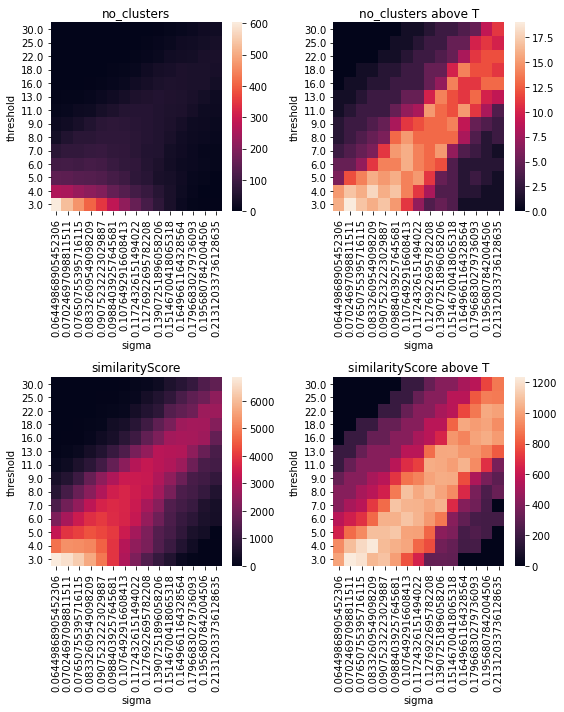

In [14]:
fig,axs = plt.subplots(2,2,figsize=(8,10));

ax = axs[0,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters');

ax = axs[0,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters above T');

ax = axs[1,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('similarityScore');

ax = axs[1,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax,);
ax.invert_yaxis()
ax.set_title('similarityScore above T');

plt.tight_layout()

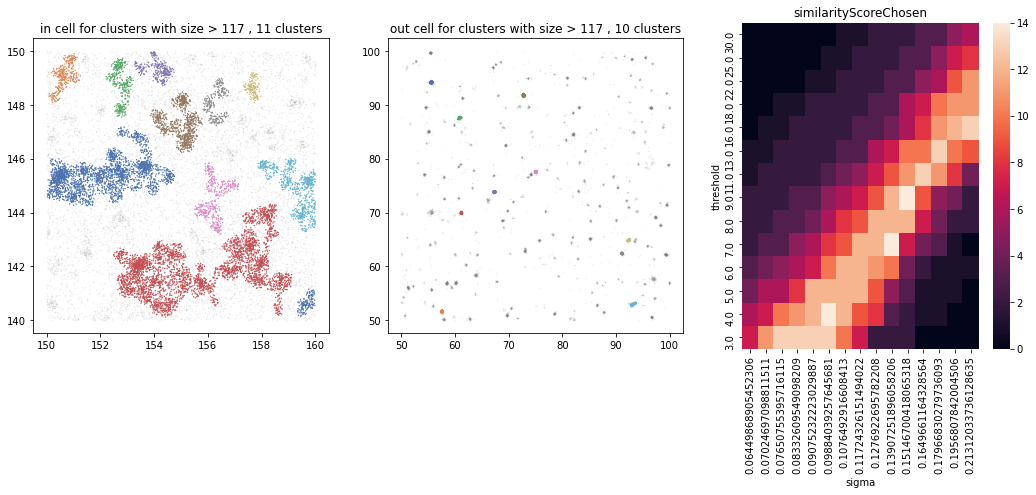

In [15]:
fig,axs = plt.subplots(1,3,figsize=(18,6));


row_ps = CB.phasespace_all_aboveT.loc[175,:];

PlotScatter(CB.XC_incell,row_ps['labels'],ax=axs[0])
PlotScatter(CB.XC_outcell,row_ps['labels_ref'],ax=axs[1])
if('T' in CB.phasespace_all_aboveT.columns):
    axs[0].set_title('in cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
    axs[1].set_title('out cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');
else:
    axs[0].set_title('in cell for '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
    axs[1].set_title('out cell for ' +str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');            

#axs[1].set_ylim([57500,62500]);
#axs[1].set_xlim([55000,60000]);

if(False): 
    axs[0].axis('off');
    axs[1].axis('off')

    axs[0].set_title('Inside of cell');
    axs[1].set_title('Reference -- Outside of cell');

plt.savefig(CB.save_name+"_OptimalClustering.png",bbox_inches="tight");

ax = axs[2];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='similarityScoreChosen', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()


ax.set_title('similarityScoreChosen');

In [ ]:
def PlotAllClustersAlongOptimumAboveT(CB,name):
    
    df_opt_th_aboveT     = GetLineOfOptima(CB.phasespace_all_aboveT[['sigma', 'threshold','similarityScore','no_clusters']],'threshold','similarityScore');
    
    for idx,row in df_opt_th_aboveT.iterrows():
        row_ps = CB.phasespace_all_aboveT.loc[row['idx'],:];

        sigma = row['sigma'];
        threshold = row['threshold'];

        fig,axs = plt.subplots(1,2,figsize=(13,8)); 
        PlotScatter(CB.XC_incell,row_ps['labels'],ax=axs[0])
        PlotScatter(CB.XC_outcell,row_ps['labels_ref'],ax=axs[1])
        if('T' in CB.phasespace_all_aboveT.columns):
            axs[0].set_title('in cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
            axs[1].set_title('out cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');
        else:
            axs[0].set_title('in cell for '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
            axs[1].set_title('out cell for ' +str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');            

        #axs[1].set_ylim([57500,62500]);
        #axs[1].set_xlim([55000,60000]);

        if(False): 
            axs[0].axis('off');
            axs[1].axis('off')

            axs[0].set_title('Inside of cell');
            axs[1].set_title('Reference -- Outside of cell');

        plt.savefig(CB.save_name+"_OptimalClustering_split_threshold_"+str(threshold)+"_"+name+".png",bbox_inches="tight");

In [ ]:
PlotAllClustersAlongOptimumAboveT(CB,'aboveT')

In [ ]:
df_incell   = CB.df_clusterSizes_all[(CB.df_clusterSizes_all['type']=='incell')];
df_outcell  = CB.df_clusterSizes_all[(CB.df_clusterSizes_all['type']=='outcell')];
GetOptimalTH(df_incell,df_outcell,criterion='clusterSize',min_noClustersToAnalyse=10,bestRequiredRate=0.8)

In [ ]:
np.maximum(np.ones((10,)),2)

In [16]:
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import LoadPoints

In [44]:
def SelectPoints(XC,N_select):
    
    xymin,xymax = np.min(XC,axis=0),np.max(XC,axis=0);

    #Choose random point in area:
    xy_center = xymin + np.random.rand(2)*(xymax-xymin);
    print('Center = '+str(xy_center));
    rs = np.linalg.norm(XC-xy_center,axis=1)
    r  = np.sort(rs)[N_select];

    return XC[rs<r];

In [65]:
outputfolder = "../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/";
XC = LoadPoints(outputfolder+'X_incell.txt');
Xsel = SetParameterFile(XC,200000);

261117 points loaded from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/X_incell.txt
Center = [265.58316916 168.4178193 ]


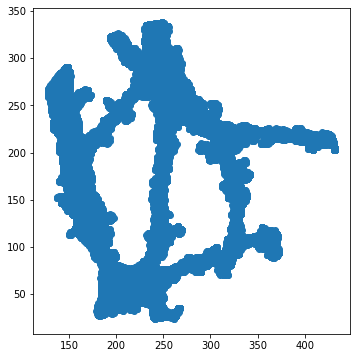

In [66]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(Xsel[:,0],Xsel[:,1])
ax.set_aspect(1)

22.663739404970872

In [25]:
(xymax-xymin)

array([380.705688, 434.631642])

In [20]:
SetParameterFile();

261117 points loaded from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/X_incell.txt


In [ ]:
    parameters_TTX = {'mainfolder'    :'ProteinData_ttx_1hr_2/',\
                  'image_filename':'AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20_X',\
                  'incell_window' :[40000,45000,40000,45000],\
                  'noise_window'  :[50000,60000,40000,50000],\
                  'datascale'     :158,
                  'algo'          :'DbscanLoop',\
                  'analysis_name' :'dataWindow_5'};